<a href="https://colab.research.google.com/github/samuelrubert/pucrio-mvp-deeplearning/blob/main/Meu_classificador_de_imagens_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificador de imagens CIFAR-10

## Definição

O objetivo deste projeto é criar e treinar um modelo convolucional capaz de classificar as imagens de um conjunto de dados.

O projeto usará o conjunto de imagens CIFAR-10.

Informações:

https://www.cs.toronto.edu/~kriz/cifar.html

Referência:

Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.
https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

Esse conjunto é formado por 60000 imagens RGB de tamanho 32x32, divididas igualmente entre 10 categorias de animais e objetos. O conjunto ainda é dividido entre 50000 imagens de treino e 10000 imagens de teste. Os rótulos de saída são vetores com um numeral entre 0 e 9 que representa a classe da imagem.

## Bibliotecas e configurações

Vamos importar a biblioteca tensorflow para criação, treino e uso da rede neural, e outras bibliotecas utilitárias.

In [ ]:
import tensorflow as tf

import math
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('dark_background')

Definir uma semente para os geradores aleatórios, de forma a produzir resultados consistentes.

In [ ]:
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

## Funções

Definir uma função para exibir o gráfico de resultados de cada modelo.

In [ ]:
def plotar_historico(history):
    plt.figure(figsize=(5+1*(epocas-1), 4))

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.subplot(1, 2, 1)
    plt.plot(range(1, epocas+1), loss, label='Treino', color='blue')
    plt.plot(range(1, epocas+1), val_loss, label='Validação', color='yellow')
    plt.legend(loc='upper right')
    plt.title('Perda de Treino e Validação')
    plt.ylabel('Loss')
    plt.xlabel('Época')


    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epocas+1), acc, label='Treino', color='blue')
    plt.plot(range(1, epocas+1), val_acc, label='Validação', color='yellow')
    plt.legend(loc='lower right')
    plt.title('Acurácia de Treino e Validação')
    plt.ylabel('Acurácia')
    plt.xlabel('Época')

    plt.show()

Função para exibir algumas saídas do modelo

In [ ]:
def testar_saidas(modelo, num_imgs):
    saidas = []
    start = 115
    for i in range(start, start+num_imgs):
        # Exibir imagem de entrada
        img = x_test[i]
        plt.figure(figsize=(1, 1))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Ativar o classificador
        input = np.array([img]) # Batch com 1 elemento
        out = modelo.predict(input, verbose=0)

        # Exibir categoria de saída
        cat = categorias[np.argmax(out)]
        prob = np.round(np.max(out) * 100, 1)
        print(f"Saída escolhida: {cat} -- {prob}%")

        # Exibir segunda opção
        out2 = out
        out2[0][np.argmax(out)] = 0
        cat2 = categorias[np.argmax(out2)]
        prob2 = np.round(np.max(out2) * 100, 1)
        print(f"Segunda opção: {cat2} -- {prob2}%")
        print()

## Preparação do dataset

Carga do conjunto de dados

In [ ]:
# Carga do dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


Converter os valores de entrada para a faixa [0,1], que é a faixa esperada pelas bibliotecas para dados do tipo _float_.

In [ ]:
# Converter entradas
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Obter o número de classes, que será usado na criação do modelo.

In [ ]:
# Obter o número de classes
num_classes = len(np.unique(y_train))
print(num_classes)

10


Criar uma lista de categorias, para traduzir os resultados numéricos da rede neural em texto compreensível. O índice da lista corresponde ao número da categoria.

In [ ]:
# Criar uma lista de categorias
categorias = [
    "Avião",
    "Carro",
    "Ave",
    "Gato",
    "Cervo",
    "Cão",
    "Sapo",
    "Cavalo",
    "Barco",
    "Caminhão"
]

Visualizar um elemento e sua categoria.

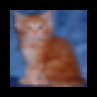

3 - Gato


In [ ]:
# Exibir um elemento do dataset
i = 91
img = x_train[i]

plt.figure(figsize=(1, 1))
plt.imshow(img)
plt.axis('off')
plt.show()

print(y_train[i][0], '-', categorias[y_train[i][0]])

# Modelo 1

## Modelagem

Vamos começar com um modelo de 4 camadas:

- Duas camadas convolucionais com stride=2 para redução das dimensões. Utilizam a função de ativação ReLU, que é de computação simples e um ponto de partida comum em redes convolucionais.
- Uma camada de achatamento.
- Uma saída densa com ativação softmax para obter um vetor de probabilidades de categorias.

Este modelo foi capaz de classificar o dataset MNIST com acurácia de >98%, por isso será nosso ponto de partida.

In [ ]:
class Classificador(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'), # 8x8
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador = Classificador()

Um teste para verificar se o modelo foi criado corretamente.

In [ ]:
# Teste do classificador
input = x_train[:1] # Batch com 1 elemento

output = classificador.predict(input)

print(output)

1/1 [==============================] - 2s 2s/step
[[0.1140788  0.09589719 0.10017095 0.10453084 0.10593447 0.08870903
  0.10050742 0.10309764 0.10365091 0.08342276]]


## Treinamento

Vamos configurar o modelo para treino, utilizando o algoritmo de otimização Adam.

Vamos usar também a função de perda *SparseCategoricalCrossentropy*, que é capaz de calcular o erro entre um valor numérico (a categoria de cada imagem) e o vetor de probabilidades emitido pelo modelo.

Por fim, configurar o treinamento para medir a acurácia do modelo.

In [ ]:
classificador.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

Executar 12 épocas de treinamento.

In [ ]:
epocas = 12

history = classificador.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/12
1407/1407 [==============================] - 8s 4ms/step - loss: 1.5442 - accuracy: 0.4510 - val_loss: 1.3385 - val_accuracy: 0.5222
Epoch 2/12
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2325 - accuracy: 0.5663 - val_loss: 1.1717 - val_accuracy: 0.5894
Epoch 3/12
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1012 - accuracy: 0.6127 - val_loss: 1.0947 - val_accuracy: 0.6104
Epoch 4/12
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0131 - accuracy: 0.6450 - val_loss: 1.0719 - val_accuracy: 0.6234
Epoch 5/12
1407/1407 [==============================] - 5s 3ms/step - loss: 0.9438 - accuracy: 0.6708 - val_loss: 1.0307 - val_accuracy: 0.6444
Epoch 6/12
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8919 - accuracy: 0.6880 - val_loss: 1.0369 - val_accuracy: 0.6410
Epoch 7/12
1407/1407 [==============================] - 5s 3ms/step - loss: 0.8452 - accuracy: 0.7060 - val_loss: 1.0159 - val_accuracy:

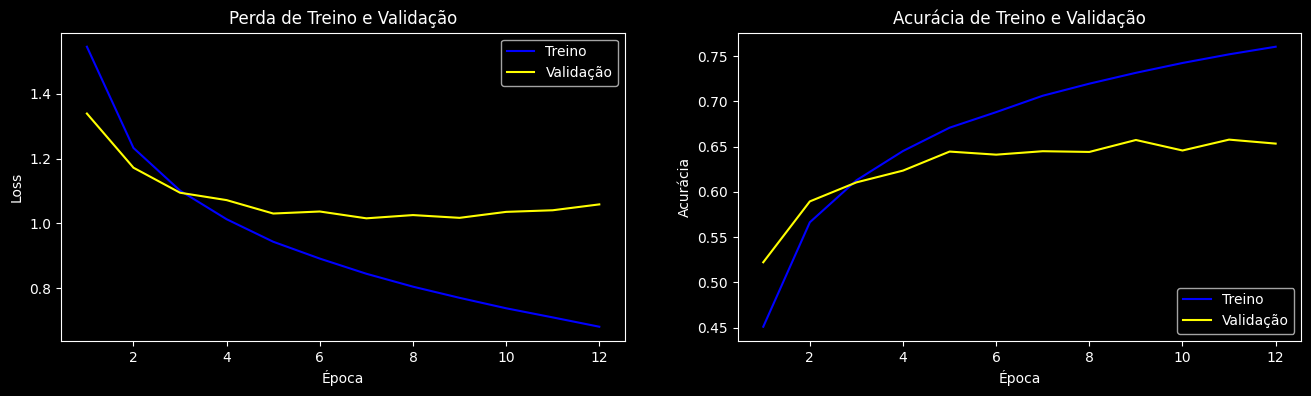

In [ ]:
plotar_historico(history)

## Avaliação

Epoch 12/12

loss: 0.6687 - accuracy: 0.7664 - val_loss: 1.0390 - val_accuracy: 0.6580

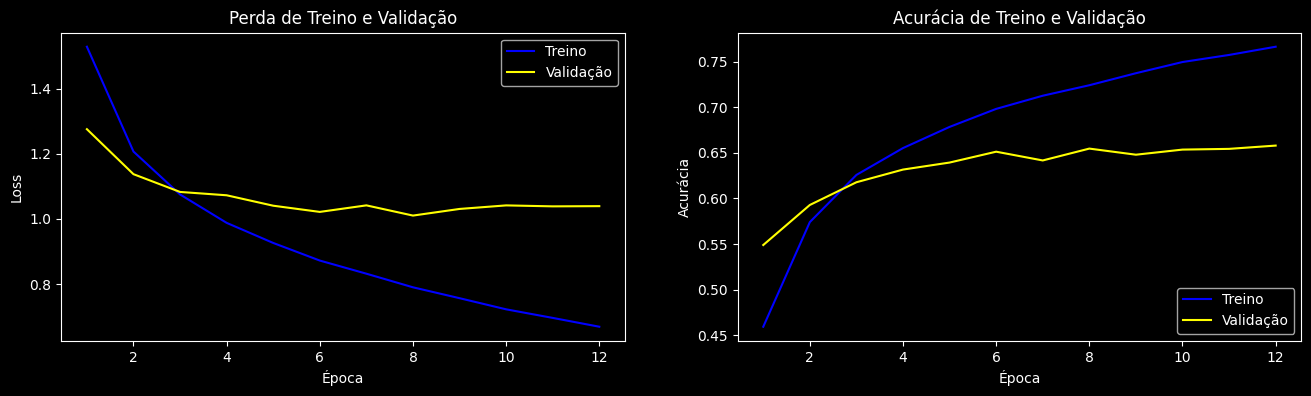

O primeiro modelo consegue avançar no aprendizado, mas parece estabilizar numa acurácia em torno de 65%. Percebe-se desde a época 3 um distanciamento entre o desempenho de treino e o de validação, indicativo de _overfitting_.

# Modelo 2: dropout

## Modelagem

Uma estratégia comum para reduzir o _overfitting_ em redes convolucionais é empregar a técnica de regularização _dropout_.

O _dropout_ "desliga" alguns neurônios aleatoriamente durante o treinamento, o que tende a aumentar a capacidade de generalização do modelo. É aplicado somente durante o treinamento.

O _dropout_ é comumente empregado antes das camadas densas do modelo com taxa entre 0.3 e 0.5. Vamos aplicar essa estratégia.

In [ ]:
class Classificador2(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'), # 8x8
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador = Classificador2()

## Treinamento

In [ ]:
classificador.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 12

history = classificador.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/12
1407/1407 [==============================] - 8s 4ms/step - loss: 1.5882 - accuracy: 0.4323 - val_loss: 1.3567 - val_accuracy: 0.5186
Epoch 2/12
1407/1407 [==============================] - 5s 4ms/step - loss: 1.3203 - accuracy: 0.5333 - val_loss: 1.2210 - val_accuracy: 0.5744
Epoch 3/12
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2248 - accuracy: 0.5654 - val_loss: 1.1482 - val_accuracy: 0.5996
Epoch 4/12
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1447 - accuracy: 0.5951 - val_loss: 1.0724 - val_accuracy: 0.6250
Epoch 5/12
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0873 - accuracy: 0.6158 - val_loss: 1.0413 - val_accuracy: 0.6406
Epoch 6/12
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0380 - accuracy: 0.6362 - val_loss: 1.0263 - val_accuracy: 0.6478
Epoch 7/12
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0000 - accuracy: 0.6508 - val_loss: 0.9678 - val_accuracy:

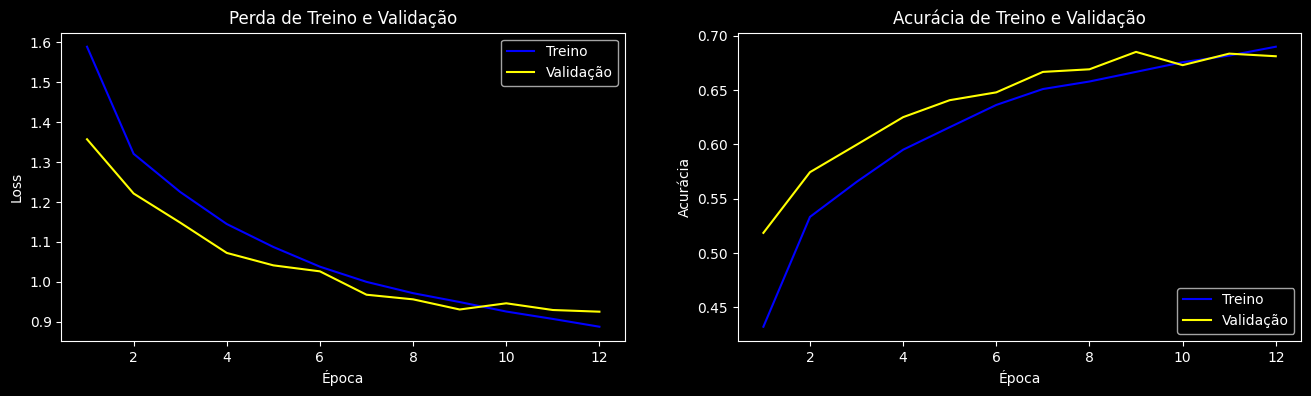

In [ ]:
plotar_historico(history)

## Avaliação

Epoch 12/12

loss: 0.8772 - accuracy: 0.6937 - val_loss: 0.9505 - val_accuracy: 0.6661

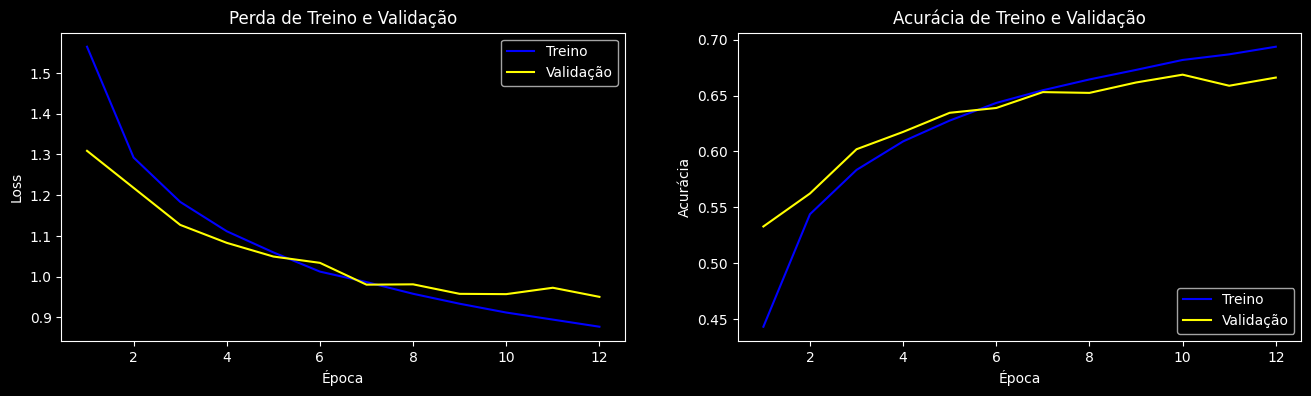

A aplicação do _dropout_ parece ter tido o resultado esperado, reduzindo consideravelmente a distância entre o desempenho de treino e o de validação.

A acurácia do modelo ficou em torno de 67%, e a inclinação da curva sugere que o modelo ainda poderia evoluir, mas que o aprendizado já estava próximo da estabilidade.

# Modelo 3: complexidade

## Modelagem

No intuito de aumentar a acurácia do modelo, vamos atribuir mais complexidade a ele na forma de novas camadas convolucionais e densas.

In [ ]:
class Classificador3(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'), # 8x8
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu'), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador = Classificador3()

## Treinamento

In [ ]:
classificador.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 12

history = classificador.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/12
1407/1407 [==============================] - 9s 5ms/step - loss: 1.5522 - accuracy: 0.4312 - val_loss: 1.2733 - val_accuracy: 0.5380
Epoch 2/12
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2260 - accuracy: 0.5612 - val_loss: 1.0607 - val_accuracy: 0.6280
Epoch 3/12
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0674 - accuracy: 0.6177 - val_loss: 1.0106 - val_accuracy: 0.6420
Epoch 4/12
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9534 - accuracy: 0.6599 - val_loss: 0.9708 - val_accuracy: 0.6594
Epoch 5/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8582 - accuracy: 0.6969 - val_loss: 0.8978 - val_accuracy: 0.6800
Epoch 6/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7733 - accuracy: 0.7247 - val_loss: 0.8907 - val_accuracy: 0.6916
Epoch 7/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7007 - accuracy: 0.7512 - val_loss: 0.8817 - val_accuracy:

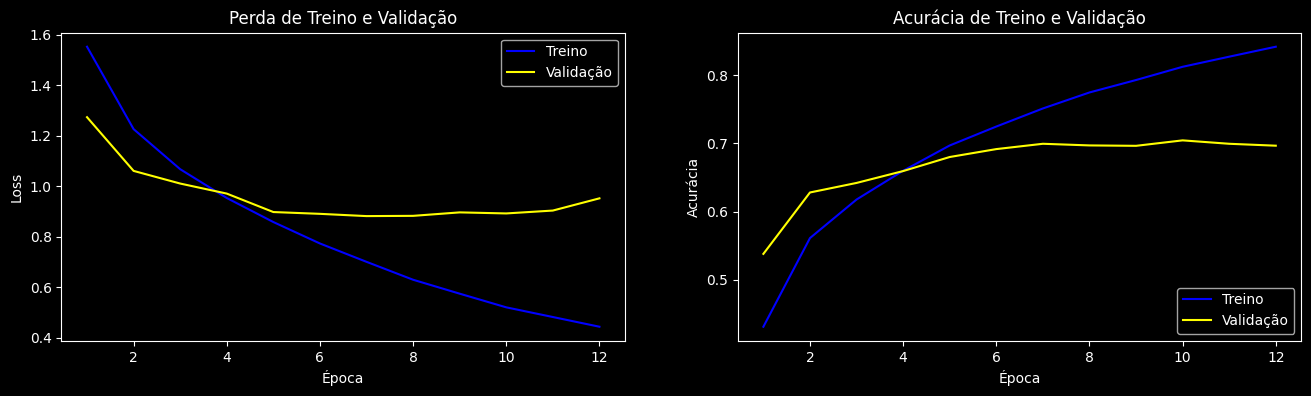

In [ ]:
plotar_historico(history)

## Avaliação

Epoch 12/12

loss: 0.4936 - accuracy: 0.8239 - val_loss: 0.9398 - val_accuracy: 0.6985

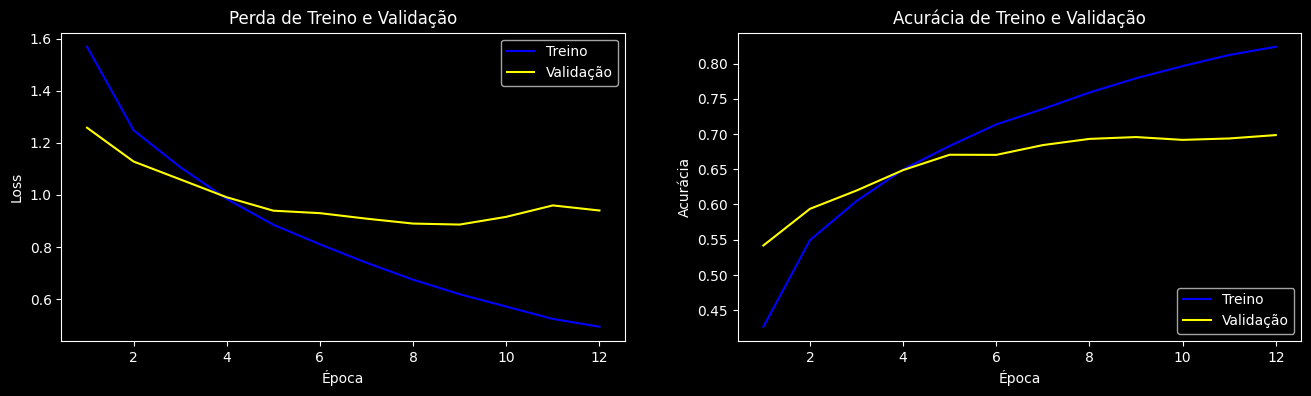

Nesta etapa percebemos que houve redução da perda e aumento da acurácia do modelo para quase 70%. No entanto, observamos novamente um grande distanciamento entre o desempenho de treino e de validação.

# Modelo 4.1: mais dropout

## Modelagem

Na fase 4, serão criados diferentes modelos com base no modelo 3, comparando diferentes técnicas no combate ao _overfitting_.

Nesta versão, aplicaremos mais duas camadas de _dropout_ junto às camadas densas do modelo.

In [ ]:
class Classificador4_1(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'), # 8x8
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu'), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador = Classificador4_1()

## Treinamento

In [ ]:
classificador.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

Com o aumento da complexidade, o aprendizado dos modelos tem ficado mais lento. Vamos aumentar o número de épocas de treino para 15.

In [ ]:
epocas = 15

history = classificador.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 10s 5ms/step - loss: 1.6975 - accuracy: 0.3776 - val_loss: 1.3728 - val_accuracy: 0.4986
Epoch 2/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3898 - accuracy: 0.5024 - val_loss: 1.1729 - val_accuracy: 0.5680
Epoch 3/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2545 - accuracy: 0.5512 - val_loss: 1.1205 - val_accuracy: 0.5980
Epoch 4/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1613 - accuracy: 0.5883 - val_loss: 1.0599 - val_accuracy: 0.6232
Epoch 5/15
1407/1407 [==============================] - 6s 5ms/step - loss: 1.0805 - accuracy: 0.6199 - val_loss: 1.0014 - val_accuracy: 0.6488
Epoch 6/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0234 - accuracy: 0.6383 - val_loss: 0.9887 - val_accuracy: 0.6550
Epoch 7/15
1407/1407 [==============================] - 6s 5ms/step - loss: 0.9732 - accuracy: 0.6580 - val_loss: 0.9201 - val_accuracy

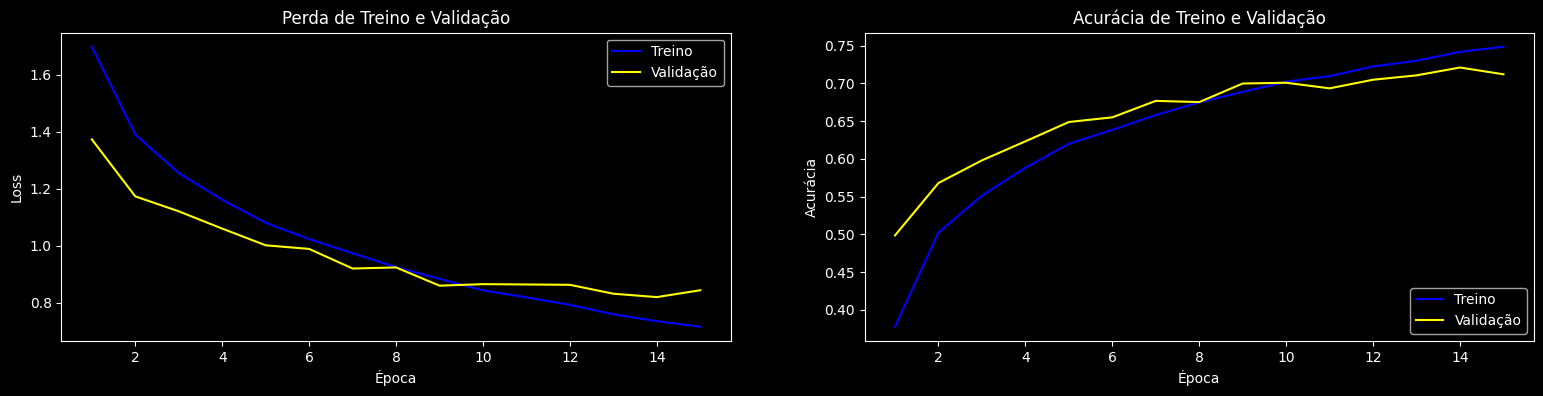

In [ ]:
plotar_historico(history)

## Avaliação

Epoch 15/15

loss: 0.7160 - accuracy: 0.7485 - val_loss: 0.8439 - val_accuracy: 0.7120

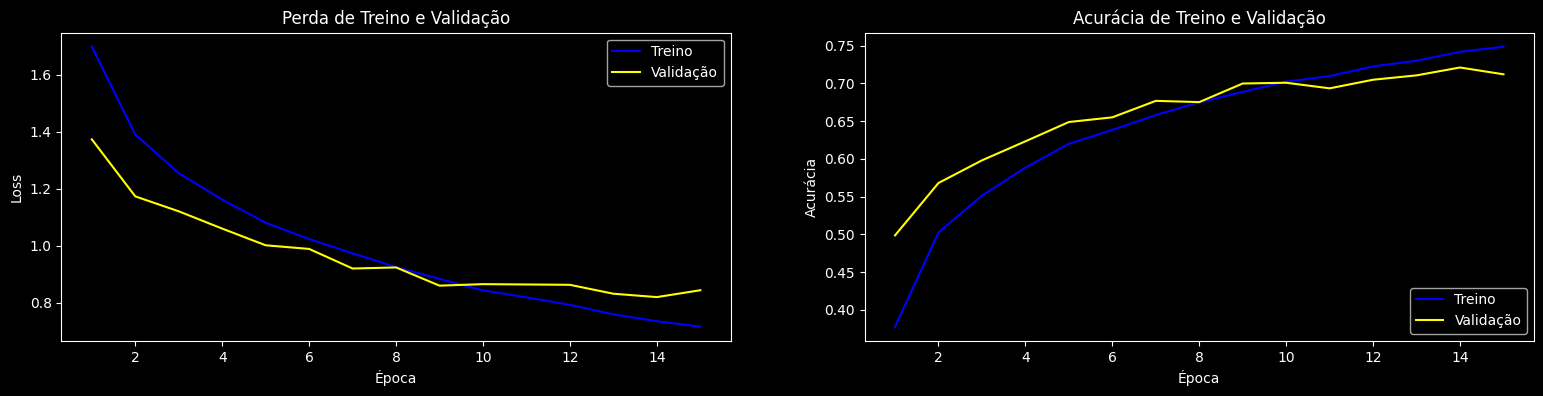

O modelo manteve a acurácia e reduziu a perda, enquanto aproximou novamente os resultados de treino e validação. Porém ainda se observa distanciamento entre eles a partir da época 10.

# Modelo 4.2: mais dropout

## Modelagem

Esta versão também aplicará mais duas camadas de _dropout_, porém numa configuração diferente, com uma delas entre camadas convolucionais, o que é menos usual.

In [ ]:
class Classificador4_2(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'), # 8x8
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu'), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador = Classificador4_2()

## Treinamento

In [ ]:
classificador.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 15

history = classificador.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 10s 6ms/step - loss: 1.6593 - accuracy: 0.3886 - val_loss: 1.3701 - val_accuracy: 0.4992
Epoch 2/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3632 - accuracy: 0.5069 - val_loss: 1.2276 - val_accuracy: 0.5578
Epoch 3/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2568 - accuracy: 0.5487 - val_loss: 1.1462 - val_accuracy: 0.5890
Epoch 4/15
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1784 - accuracy: 0.5772 - val_loss: 1.0797 - val_accuracy: 0.6186
Epoch 5/15
1407/1407 [==============================] - 6s 5ms/step - loss: 1.1239 - accuracy: 0.5993 - val_loss: 1.0624 - val_accuracy: 0.6244
Epoch 6/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0768 - accuracy: 0.6143 - val_loss: 0.9757 - val_accuracy: 0.6490
Epoch 7/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0350 - accuracy: 0.6312 - val_loss: 0.9488 - val_accuracy

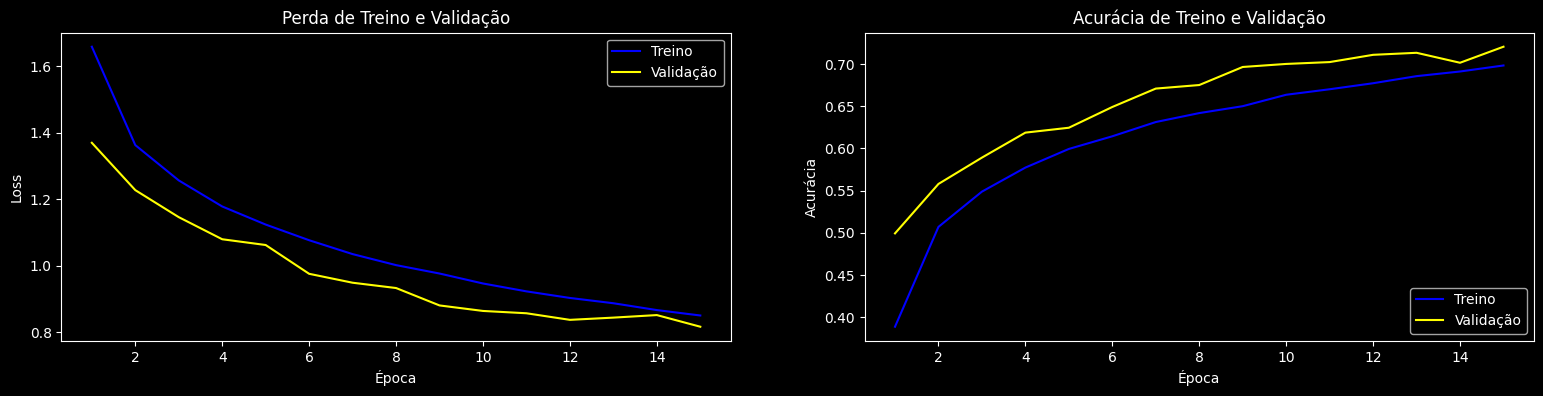

In [ ]:
plotar_historico(history)

## Avaliação

Epoch 15/15

loss: 0.8502 - accuracy: 0.6982 - val_loss: 0.8163 - val_accuracy: 0.7204

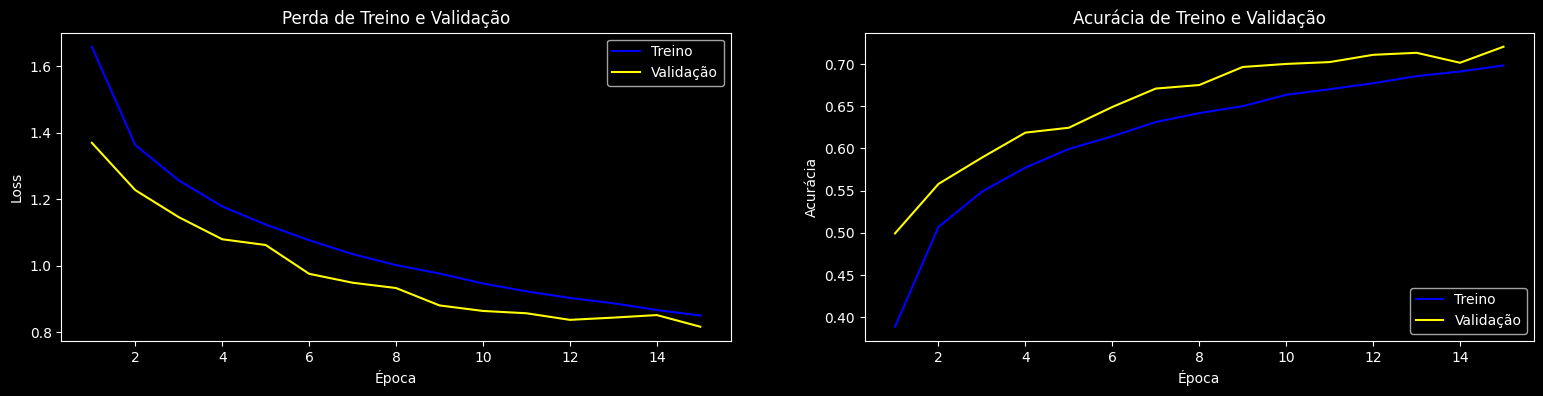

Esta segunda configuração de _dropout_ teve melhor desempenho que a anterior, atingindo perda menor e acurácia maior, com os resultados de validação superiores aos de treino.

# Modelo 4.3: batch norm

## Modelagem

Nesta versão, aplicaremos a técnica de normalização em lote (_batch normalization_), que pode melhorar o desempenho do modelo e combater o _overfitting_.

Serão duas camadas de normalização após as duas primeiras camadas convolucionais.

In [ ]:
class Classificador4_3(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'), # 16x16
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'), # 8x8
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu'), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador = Classificador4_3()

## Treinamento

In [ ]:
classificador.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 15

history = classificador.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 10s 5ms/step - loss: 1.4860 - accuracy: 0.4574 - val_loss: 1.2616 - val_accuracy: 0.5448
Epoch 2/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1718 - accuracy: 0.5818 - val_loss: 1.1225 - val_accuracy: 0.5962
Epoch 3/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0041 - accuracy: 0.6428 - val_loss: 0.9347 - val_accuracy: 0.6706
Epoch 4/15
1407/1407 [==============================] - 8s 5ms/step - loss: 0.8856 - accuracy: 0.6859 - val_loss: 0.9124 - val_accuracy: 0.6826
Epoch 5/15
1407/1407 [==============================] - 8s 6ms/step - loss: 0.7932 - accuracy: 0.7218 - val_loss: 1.0203 - val_accuracy: 0.6386
Epoch 6/15
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7227 - accuracy: 0.7450 - val_loss: 0.8493 - val_accuracy: 0.7108
Epoch 7/15
1407/1407 [==============================] - 8s 5ms/step - loss: 0.6504 - accuracy: 0.7712 - val_loss: 0.9064 - val_accuracy

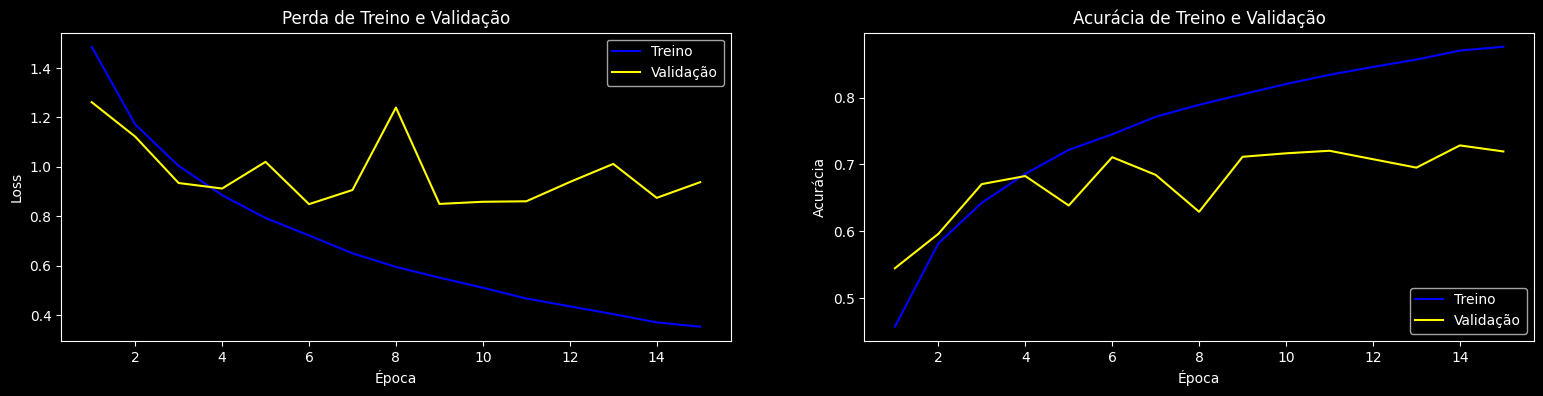

In [ ]:
plotar_historico(history)

## Avaliação

Epoch 15/15

loss: 0.3825 - accuracy: 0.8657 - val_loss: 0.9626 - val_accuracy: 0.7115

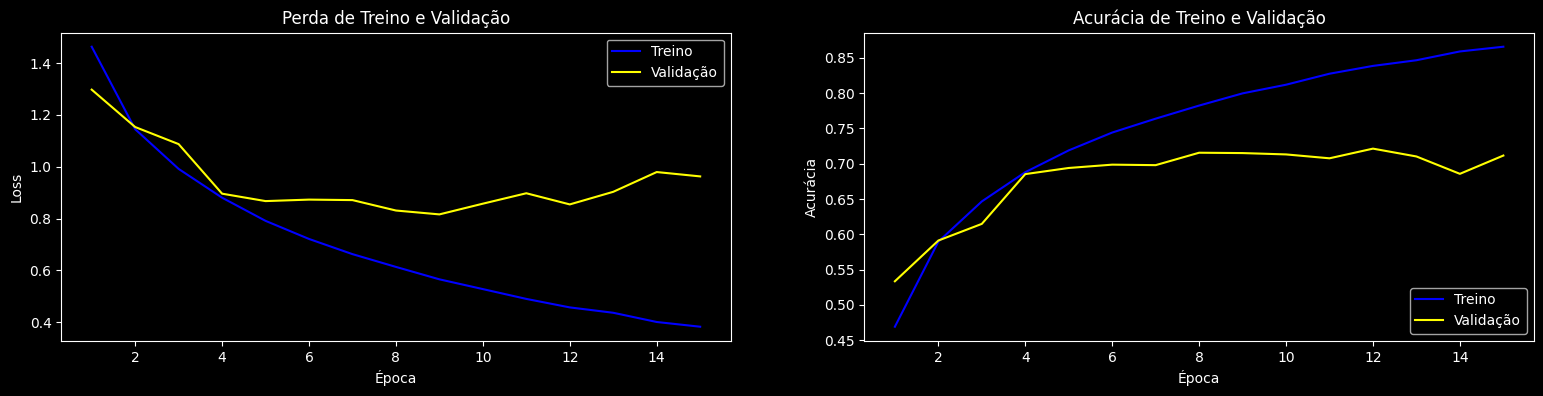

Nesta

# Modelo 4.4: data augmentation

## Modelagem

Nesta

In [ ]:
class Classificador4_4(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'), # 8x8
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu'), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador = Classificador4_4()

## Treinamento

O treinamento irá utilizar a função de perda SparseCategoricalCrossentropy, que é capaz de calcular o erro entre um valor numérico (a categoria de cada imagem) e o vetor de probabilidades emitido pelo modelo.

In [ ]:
classificador.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 15

history = classificador.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 12s 7ms/step - loss: 1.7004 - accuracy: 0.3817 - val_loss: 1.4198 - val_accuracy: 0.4846
Epoch 2/15
1407/1407 [==============================] - 14s 10ms/step - loss: 1.4423 - accuracy: 0.4792 - val_loss: 1.2158 - val_accuracy: 0.5596
Epoch 3/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3401 - accuracy: 0.5176 - val_loss: 1.2216 - val_accuracy: 0.5632
Epoch 4/15
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2736 - accuracy: 0.5459 - val_loss: 1.1718 - val_accuracy: 0.5880
Epoch 5/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.2220 - accuracy: 0.5651 - val_loss: 1.1235 - val_accuracy: 0.6004
Epoch 6/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1794 - accuracy: 0.5798 - val_loss: 1.0552 - val_accuracy: 0.6292
Epoch 7/15
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1458 - accuracy: 0.5896 - val_loss: 1.0043 - val_accura

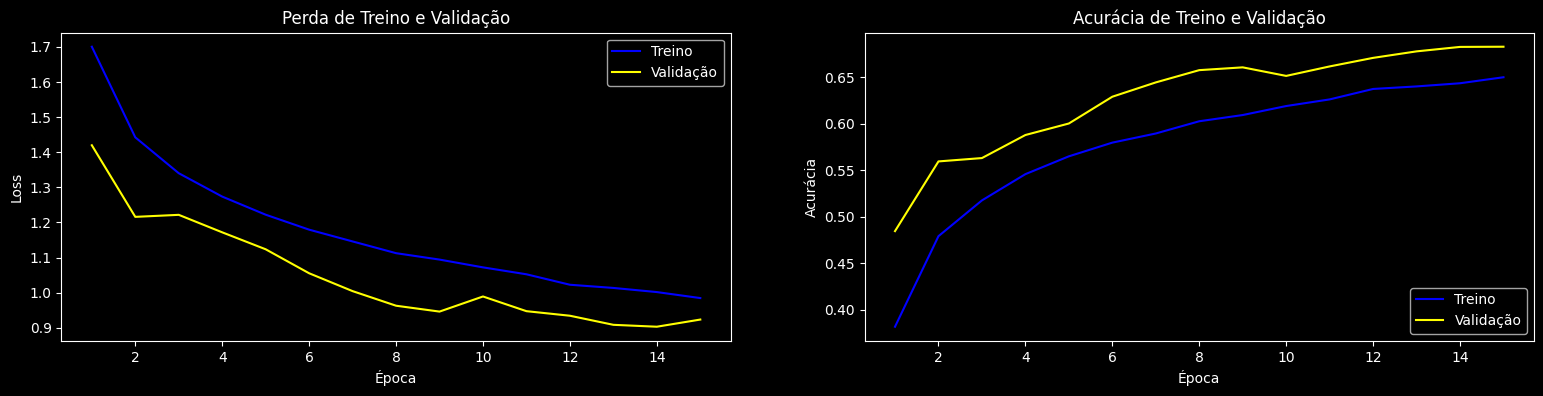

In [ ]:
plotar_historico(history)

## Avaliação

Epoch 15/15

loss: 0.9584 - accuracy: 0.6593 - val_loss: 0.9630 - val_accuracy: 0.6653

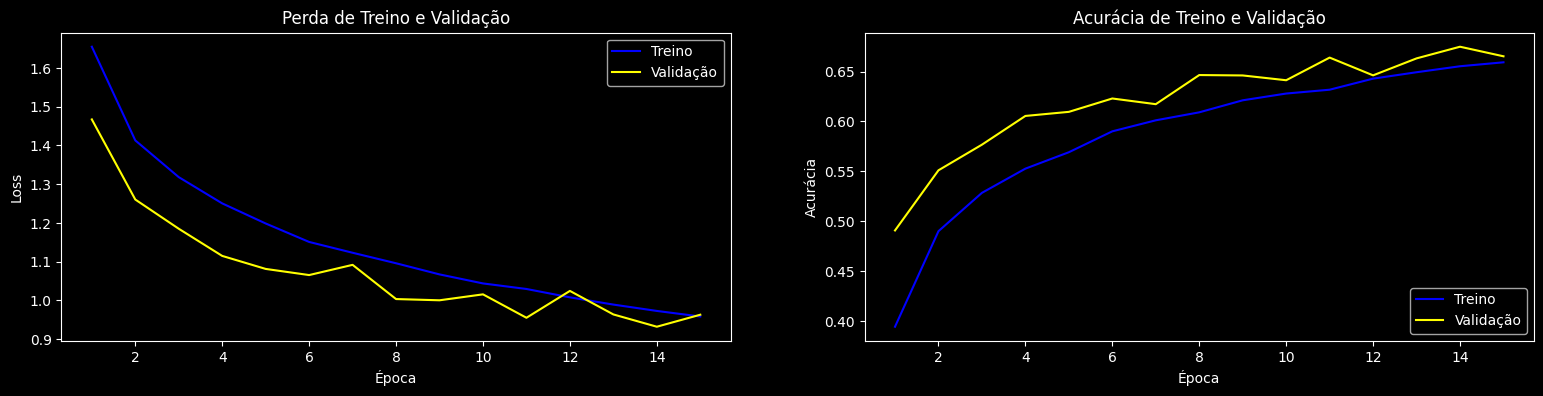

Nesta

# Modelo 5.1: drop + pool

## Modelagem

Nesta versão, vamos alterar o _stride_ das camadas convolucionais de 2 para 1, e introduzir camadas _MaxPool_ para realizar a redução das dimensões anteriormente feita pelas camadas de convolução. Em tese, isso permitirá às camadas convolucionais um maior aprendizado sobre as características das imagens.

O modelo base será o 4.2, que aplicou mais camadas de _dropout_ e teve o melhor desempenho na fase 4.

In [ ]:
class Classificador5_1(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 8x8
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador = Classificador5_1()

## Treinamento

In [ ]:
classificador.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 15

history = classificador.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 10s 5ms/step - loss: 1.5928 - accuracy: 0.4128 - val_loss: 1.2225 - val_accuracy: 0.5560
Epoch 2/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2447 - accuracy: 0.5539 - val_loss: 1.0343 - val_accuracy: 0.6372
Epoch 3/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1044 - accuracy: 0.6072 - val_loss: 0.9929 - val_accuracy: 0.6484
Epoch 4/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0293 - accuracy: 0.6365 - val_loss: 0.9485 - val_accuracy: 0.6672
Epoch 5/15
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9665 - accuracy: 0.6594 - val_loss: 0.8625 - val_accuracy: 0.6988
Epoch 6/15
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9216 - accuracy: 0.6770 - val_loss: 0.7669 - val_accuracy: 0.7414
Epoch 7/15
1407/1407 [==============================] - 8s 5ms/step - loss: 0.8871 - accuracy: 0.6869 - val_loss: 0.7556 - val_accuracy

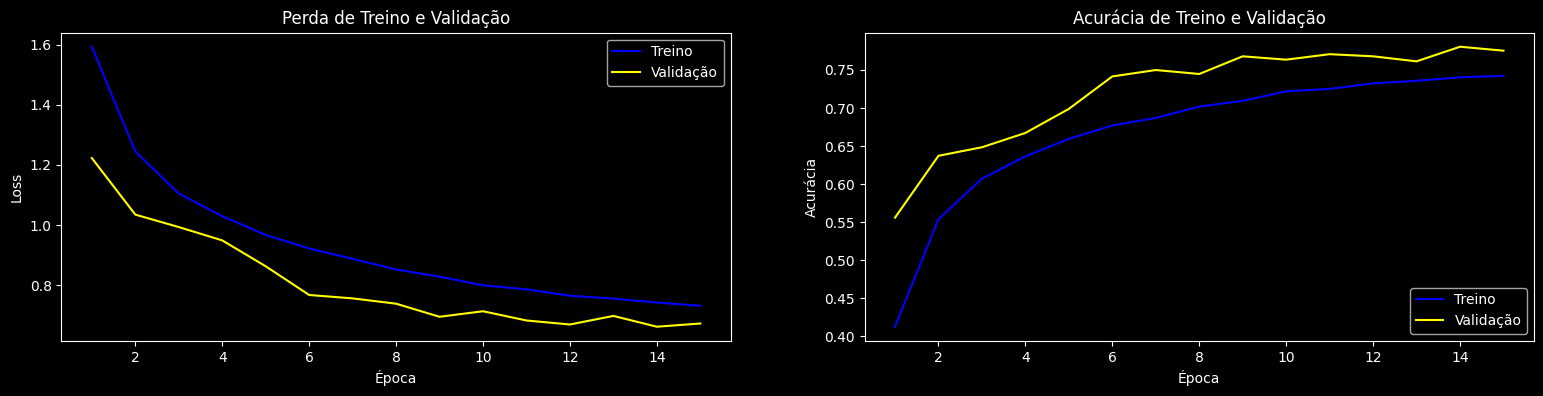

In [ ]:
plotar_historico(history)

## Avaliação

Epoch 15/15

loss: 0.7643 - accuracy: 0.7325 - val_loss: 0.7075 - val_accuracy: 0.7547

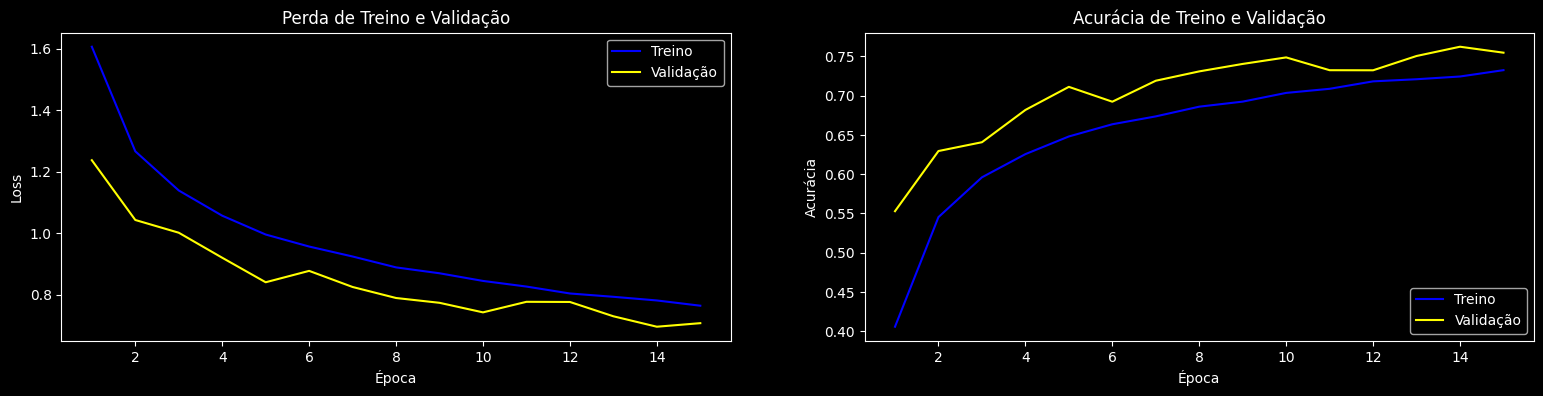

Nesta

# Modelo 5.2: aug + pool

## Modelagem

Nesta versão, vamos alterar o _stride_ das camadas convolucionais de 2 para 1, e introduzir camadas _MaxPool_ para realizar a redução das dimensões anteriormente feita pelas camadas de convolução. Em tese, isso permitirá às camadas convolucionais um maior aprendizado sobre as características das imagens.

O modelo base será o 4.4, que aplicou _data augmentation_ e teve um desempenho razoável na fase 4.

In [ ]:
class Classificador5_2(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 8x8
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador = Classificador5_2()

## Treinamento

In [ ]:
classificador.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 15

history = classificador.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 12s 7ms/step - loss: 1.6415 - accuracy: 0.3993 - val_loss: 1.3616 - val_accuracy: 0.5106
Epoch 2/15
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3511 - accuracy: 0.5160 - val_loss: 1.1473 - val_accuracy: 0.5878
Epoch 3/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.2372 - accuracy: 0.5569 - val_loss: 1.0499 - val_accuracy: 0.6294
Epoch 4/15
1407/1407 [==============================] - 10s 7ms/step - loss: 1.1648 - accuracy: 0.5854 - val_loss: 1.0685 - val_accuracy: 0.6312
Epoch 5/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1090 - accuracy: 0.6108 - val_loss: 0.9655 - val_accuracy: 0.6620
Epoch 6/15
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0633 - accuracy: 0.6239 - val_loss: 0.9331 - val_accuracy: 0.6754
Epoch 7/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0314 - accuracy: 0.6356 - val_loss: 0.8965 - val_accurac

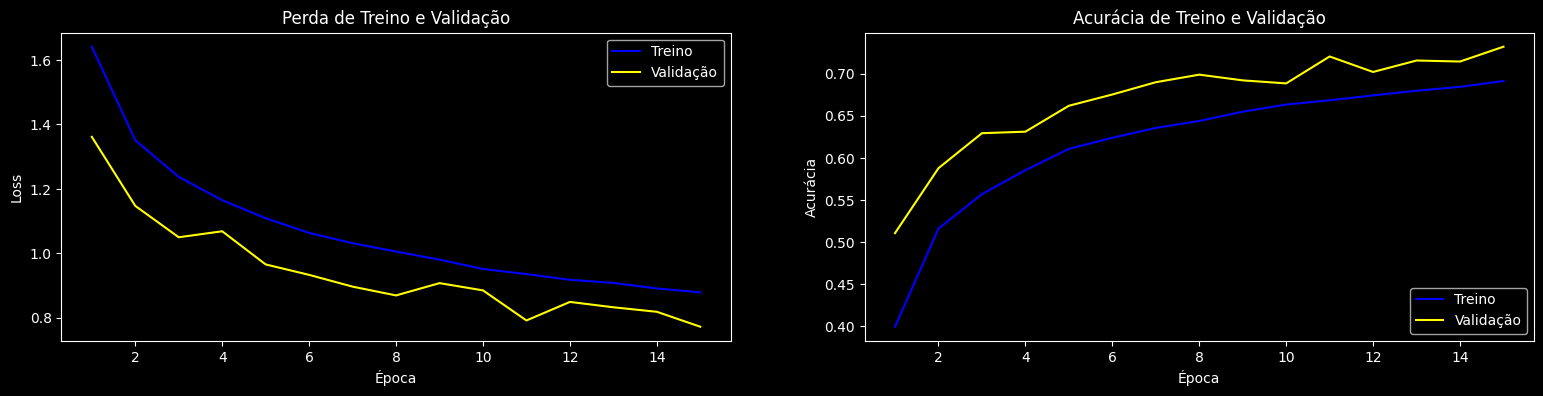

In [ ]:
plotar_historico(history)

## Avaliação

Epoch 15/15

loss: 0.8619 - accuracy: 0.6944 - val_loss: 0.7964 - val_accuracy: 0.7234

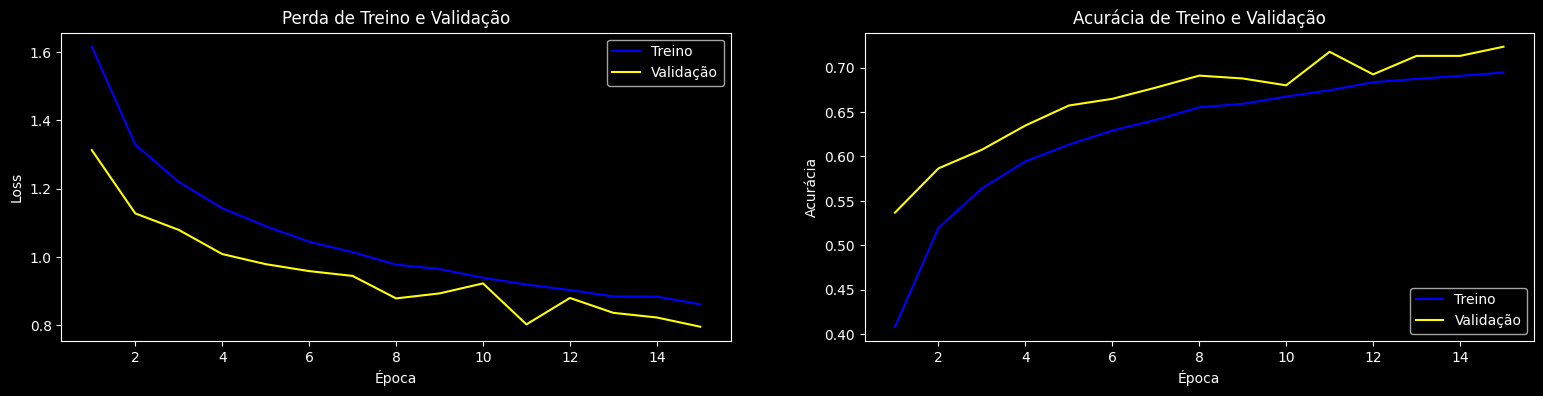

Nesta

# Modelo 5.3: drop + aug + pool

## Modelagem

Nesta versão, vamos alterar o _stride_ das camadas convolucionais de 2 para 1, e introduzir camadas _MaxPool_ para realizar a redução das dimensões anteriormente feita pelas camadas de convolução. Em tese, isso permitirá às camadas convolucionais um maior aprendizado sobre as características das imagens.

A base será a união dos modelos 4.2 e 4.4, unindo as duas técnicas mais bem-sucedidas da fase 4, _dropout_ e _data augmentation_.

In [ ]:
class Classificador5_3(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 8x8
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador = Classificador5_3()

## Treinamento

In [ ]:
classificador.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 15

history = classificador.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 12s 7ms/step - loss: 1.7270 - accuracy: 0.3648 - val_loss: 1.4356 - val_accuracy: 0.4688
Epoch 2/15
1407/1407 [==============================] - 9s 7ms/step - loss: 1.4754 - accuracy: 0.4644 - val_loss: 1.2261 - val_accuracy: 0.5572
Epoch 3/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3797 - accuracy: 0.5027 - val_loss: 1.1745 - val_accuracy: 0.5738
Epoch 4/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3152 - accuracy: 0.5254 - val_loss: 1.1878 - val_accuracy: 0.5718
Epoch 5/15
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2759 - accuracy: 0.5437 - val_loss: 1.1067 - val_accuracy: 0.6088
Epoch 6/15
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2442 - accuracy: 0.5555 - val_loss: 0.9944 - val_accuracy: 0.6570
Epoch 7/15
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2177 - accuracy: 0.5651 - val_loss: 1.0089 - val_accuracy

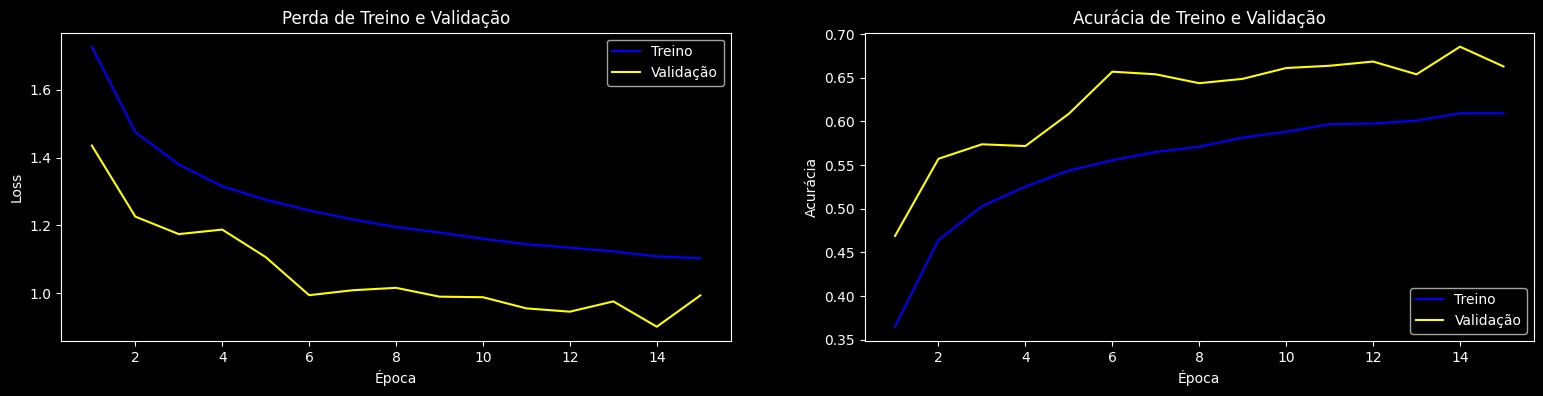

In [ ]:
plotar_historico(history)

## Avaliação

Epoch 15/15

loss: 1.1162 - accuracy: 0.6029 - val_loss: 0.9819 - val_accuracy: 0.6524

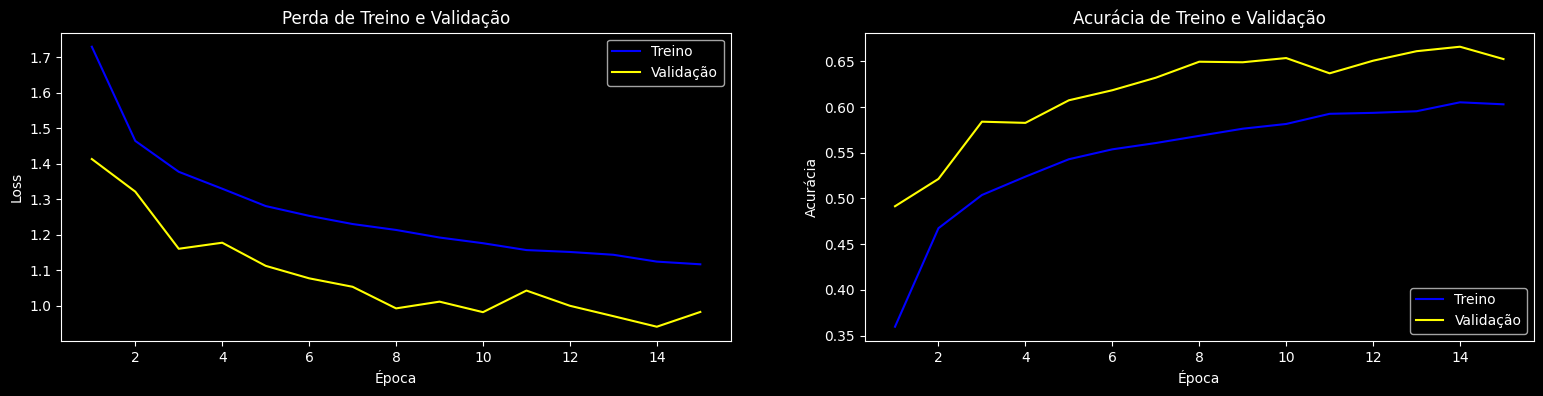

Nesta

# Modelo Final

## Modelagem

Nesta versão, vamos alterar o _stride_ das camadas convolucionais de 2 para 1, e introduzir camadas _MaxPool_ para realizar a redução das dimensões anteriormente feita pelas camadas de convolução. Em tese, isso permitirá às camadas convolucionais um maior aprendizado sobre as características das imagens.

O modelo base será o 4.2, que aplicou mais camadas de _dropout_ e teve o melhor desempenho na fase 4.

In [ ]:
class ClassificadorFinal(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 8x8
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador = ClassificadorFinal()

## Treinamento

In [ ]:
classificador.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 30

history = classificador.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/30
1407/1407 [==============================] - 9s 5ms/step - loss: 1.6427 - accuracy: 0.3934 - val_loss: 1.3837 - val_accuracy: 0.5010
Epoch 2/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3062 - accuracy: 0.5284 - val_loss: 1.0682 - val_accuracy: 0.6288
Epoch 3/30
1407/1407 [==============================] - 10s 7ms/step - loss: 1.1544 - accuracy: 0.5877 - val_loss: 0.9724 - val_accuracy: 0.6632
Epoch 4/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0633 - accuracy: 0.6220 - val_loss: 0.9316 - val_accuracy: 0.6758
Epoch 5/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9997 - accuracy: 0.6484 - val_loss: 0.8493 - val_accuracy: 0.7078
Epoch 6/30
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9562 - accuracy: 0.6633 - val_loss: 0.8224 - val_accuracy: 0.7200
Epoch 7/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9234 - accuracy: 0.6746 - val_loss: 0.8613 - val_accuracy

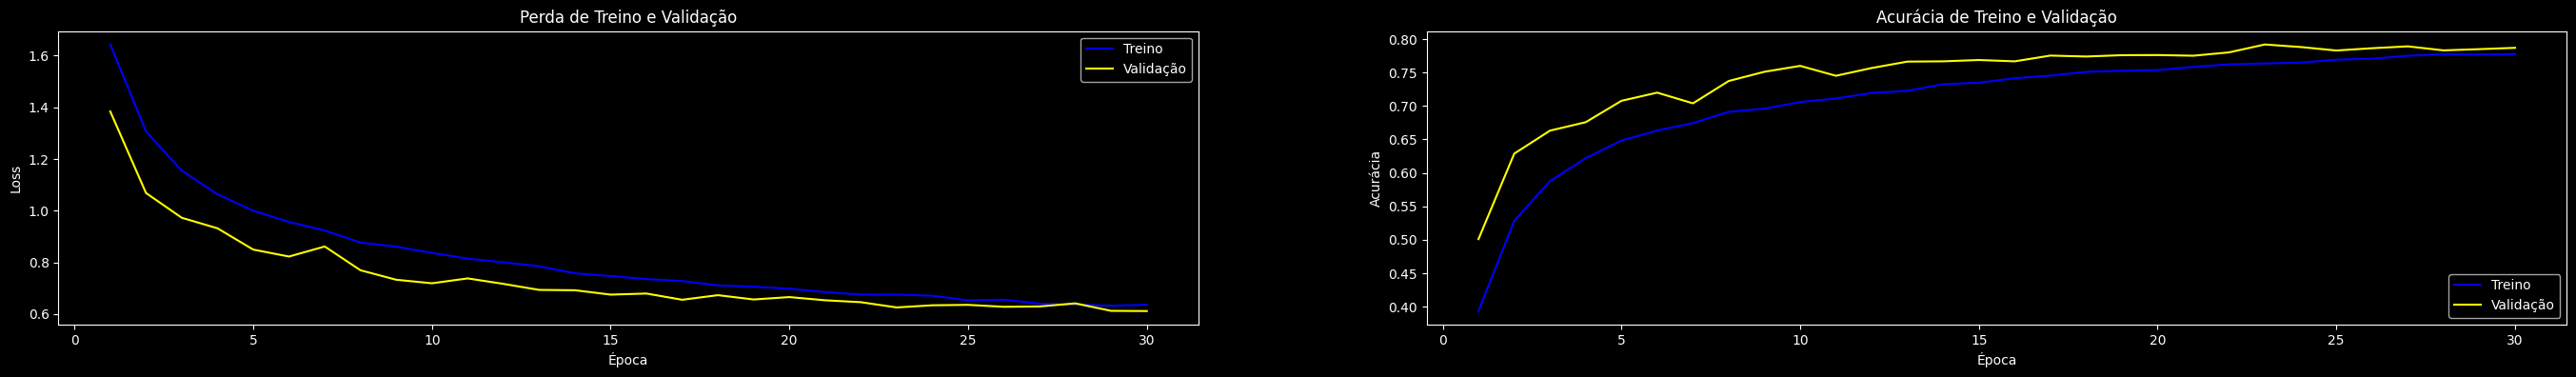

In [ ]:
plotar_historico(history)

## Avaliação

Epoch 30/30

loss: 0.6607 - accuracy: 0.7700 - val_loss: 0.6412 - val_accuracy: 0.7855

In [ ]:
classificador.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8464 - accuracy: 0.7020


[0.8463843464851379, 0.7020000219345093]

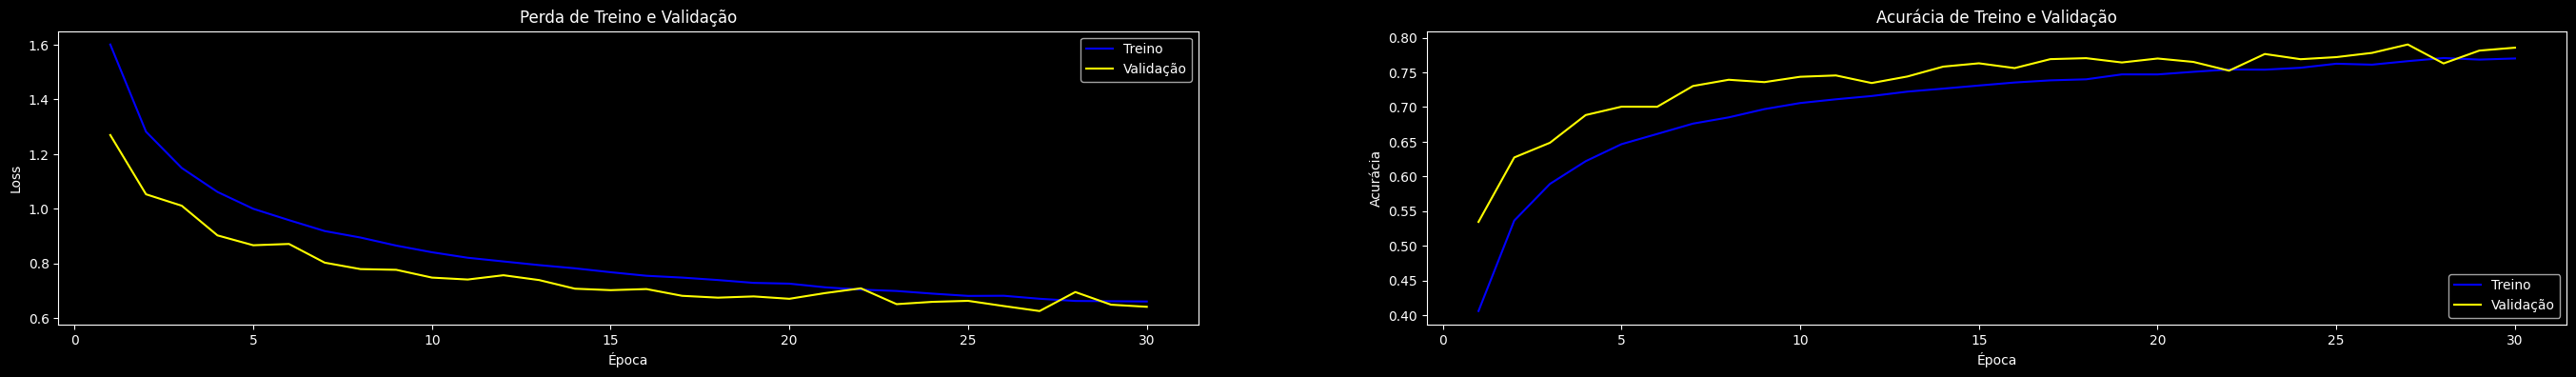

Nesta

In [ ]:
# # Importar bibliotecas
# from tensorflow.keras.models import load_model

# # Salvar o modelo
# classificador.save('ClassificadorFinal.keras')